In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import geopandas as gpd

In [ ]:
#importing all 4 datasets

taxi_df = pd.read_csv("Data\\yellow_tripdata_2023-01.csv", parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
holiday_df = pd.read_excel("Data\\us_holidays_2023.xlsx", parse_dates=[0], names=['date', 'day_of_week', 'holiday_name', 'holiday_type'])
weather_df = pd.read_csv("Data\\newyork 2023-01-01 to 2023-01-31.csv", parse_dates=['datetime'])

gdf = gpd.read_file("Data\\NYC Taxi Zones.geojson")
taxi_zone = gdf.explode(index_parts=False).reset_index(drop=True)

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\597500909.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  taxi_df = pd.read_csv("Data\\yellow_tripdata_2023-01.csv", parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [87]:
taxi_df.shape

(3066766, 19)

In [88]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [89]:
print("taxi_df")
print(taxi_df.columns)
print("holiday_df")
print(holiday_df.columns)
print("weather_df")
print(weather_df.columns)
print("taxi_zone")
print(taxi_zone.columns)

taxi_df
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')
holiday_df
Index(['date', 'day_of_week', 'holiday_name', 'holiday_type'], dtype='object')
weather_df
Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')
taxi_zone
Index(['shape_area'

In [ ]:
#data cleaning

taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])

taxi_df = taxi_df[
    (taxi_df['trip_distance'] > 0) &
    (taxi_df['PULocationID'].notnull()) &
    (taxi_df['DOLocationID'].notnull()) &
    (taxi_df['tpep_pickup_datetime'].dt.year == 2023) &
    (taxi_df['tpep_pickup_datetime'].dt.month == 1)
]


In [91]:
taxi_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [92]:
holiday_df.head()

,date,day_of_week,holiday_name,holiday_type
0,2025-01-01,Sunday,New Year's Day,Federal Holiday
1,2025-01-02,Monday,New Year's Day (substitute),State Holiday
2,2025-01-02,Monday,New Year's Day (substitute),Federal Holiday
3,2025-01-03,Tuesday,Asarah B'Tevet,Jewish holiday
4,2025-01-06,Friday,Epiphany,Christian


In [93]:
holiday_df['date'] = pd.to_datetime(holiday_df['date']).apply(lambda x: x.replace(year=2023))

In [95]:
weather_df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,newyork,2023-01-01,24.0,10.0,16.7,24.0,10.0,16.7,9.7,65.2,...,16.8,7,NaN,2023-01-01T07:06:52,2023-01-01T17:53:11,0.30,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
1,newyork,2023-01-02,22.0,8.0,15.4,22.0,7.9,15.3,8.2,64.1,...,17.2,7,NaN,2023-01-02T07:07:10,2023-01-02T17:53:49,0.34,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
2,newyork,2023-01-03,20.7,9.0,14.7,20.7,7.3,14.6,7.7,64.5,...,17.2,7,NaN,2023-01-03T07:07:28,2023-01-03T17:54:28,0.37,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
3,newyork,2023-01-04,19.0,7.0,13.0,19.0,4.8,12.6,6.1,65.6,...,17.4,7,NaN,2023-01-04T07:07:44,2023-01-04T17:55:08,0.41,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"
4,newyork,2023-01-05,19.0,8.0,13.5,19.0,5.3,12.8,8.2,71.2,...,14.5,6,NaN,2023-01-05T07:07:58,2023-01-05T17:55:48,0.44,Clear,Clear conditions throughout the day.,clear-day,"42752099999,42662099999,42754099999,remote,VAID"


In [96]:
taxi_zone.head(5)

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"POLYGON ((-74.18445 40.695, -74.18449 40.69509..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"POLYGON ((-73.82338 40.63899, -73.82277 40.635..."
2,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"POLYGON ((-73.84722 40.63197, -73.84859 40.630..."
3,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"POLYGON ((-73.79578 40.63216, -73.79804 40.631..."
4,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"POLYGON ((-73.83624 40.63111, -73.8411 40.6245..."


In [ ]:
#handling null values

taxi_df['passenger_count'].fillna(taxi_df['passenger_count'].mode()[0],inplace=True)
taxi_df['RatecodeID'].fillna(taxi_df['RatecodeID'].mode()[0],inplace=True)
taxi_df['store_and_fwd_flag'].fillna('N',inplace=True)
taxi_df['congestion_surcharge'].fillna(0, inplace=True)
taxi_df['airport_fee'].fillna(0, inplace=True)
taxi_df.isna().sum()

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\3388267375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi_df['passenger_count'].fillna(taxi_df['passenger_count'].mode()[0],inplace=True)
C:\Users\shara\AppData\Local\Temp\ipykernel_3640\3388267375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

In [ ]:
#selecting necessary features and Feature Engineering

taxi_df = taxi_df[[
    'tpep_pickup_datetime', 'PULocationID', 'trip_distance'
]]
taxi_df = taxi_df.dropna()
taxi_df['pickup_hour'] = taxi_df['tpep_pickup_datetime'].dt.hour
taxi_df['pickup_date'] = taxi_df['tpep_pickup_datetime'].dt.date


In [99]:
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

In [100]:
weather_df = weather_df[[
    'datetime', 'temp', 'humidity', 'precip', 'windgust', 'windspeed', 'visibility', 'conditions'
]]
weather_df['hour'] = weather_df['datetime'].dt.hour
weather_df['date'] = weather_df['datetime'].dt.date

In [101]:
holiday_df.isna().sum()

date            0
day_of_week     0
holiday_name    0
holiday_type    0
dtype: int64

In [102]:
taxi_zone = taxi_zone.rename(columns={'location_id': 'PULocationID'})  # For merge
taxi_zone = taxi_zone[['PULocationID', 'zone', 'borough', 'geometry']]


In [103]:
df_demand = taxi_df.groupby(['pickup_date', 'pickup_hour', 'PULocationID']).agg(
    num_trips=('PULocationID', 'count'),
    avg_trip_distance=('trip_distance', 'mean')
).reset_index()

In [104]:
weather_df.isna().sum()

datetime      0
temp          0
humidity      0
precip        0
windgust      0
windspeed     0
visibility    0
conditions    0
hour          0
date          0
dtype: int64

In [105]:
df_demand['pickup_date'] = pd.to_datetime(df_demand['pickup_date'])
df_demand['pickup_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 67545 entries, 0 to 67544
Series name: pickup_date
Non-Null Count  Dtype         
--------------  -----         
67545 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 527.8 KB


In [106]:
weather_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 31 entries, 0 to 30
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
31 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 380.0 bytes


In [107]:
df_demand.head(5)

,pickup_date,pickup_hour,PULocationID,num_trips,avg_trip_distance
0,2023-01-01,0,4,19,3.090526
1,2023-01-01,0,7,3,4.600000
2,2023-01-01,0,12,1,1.900000
3,2023-01-01,0,13,14,3.451429
4,2023-01-01,0,24,20,3.160000


In [108]:
weather_df.head(5)

,datetime,temp,humidity,precip,windgust,windspeed,visibility,conditions,hour,date
0,2023-01-01,16.7,65.2,0.0,26.6,18.4,3.1,Clear,0,2023-01-01
1,2023-01-02,15.4,64.1,0.0,26.6,16.6,3.8,Clear,0,2023-01-02
2,2023-01-03,14.7,64.5,0.0,27.4,14.8,4.0,Clear,0,2023-01-03
3,2023-01-04,13.0,65.6,0.0,38.5,22.3,3.6,Clear,0,2023-01-04
4,2023-01-05,13.5,71.2,0.0,32.4,22.3,2.8,Clear,0,2023-01-05


In [109]:
#merge with weather
df_merged = df_demand.merge(weather_df, how='left', left_on = 'pickup_date',right_on = 'datetime')

In [110]:
df_merged.drop(columns=['date', 'datetime', 'hour'], inplace=True)

In [111]:
df_merged.isnull().sum()

pickup_date          0
pickup_hour          0
PULocationID         0
num_trips            0
avg_trip_distance    0
temp                 0
humidity             0
precip               0
windgust             0
windspeed            0
visibility           0
conditions           0
dtype: int64

In [112]:
holiday_df['date'] = holiday_df['date'].apply(lambda x: x.replace(year=2023))

In [113]:
df_merged.head(5)

,pickup_date,pickup_hour,PULocationID,num_trips,avg_trip_distance,temp,humidity,precip,windgust,windspeed,visibility,conditions
0,2023-01-01,0,4,19,3.090526,16.7,65.2,0.0,26.6,18.4,3.1,Clear
1,2023-01-01,0,7,3,4.600000,16.7,65.2,0.0,26.6,18.4,3.1,Clear
2,2023-01-01,0,12,1,1.900000,16.7,65.2,0.0,26.6,18.4,3.1,Clear
3,2023-01-01,0,13,14,3.451429,16.7,65.2,0.0,26.6,18.4,3.1,Clear
4,2023-01-01,0,24,20,3.160000,16.7,65.2,0.0,26.6,18.4,3.1,Clear


In [114]:
holiday_df.head(5)

,date,day_of_week,holiday_name,holiday_type
0,2023-01-01,Sunday,New Year's Day,Federal Holiday
1,2023-01-02,Monday,New Year's Day (substitute),State Holiday
2,2023-01-02,Monday,New Year's Day (substitute),Federal Holiday
3,2023-01-03,Tuesday,Asarah B'Tevet,Jewish holiday
4,2023-01-06,Friday,Epiphany,Christian


In [115]:
#merge with holiday

df_merged = df_merged.merge(holiday_df[['date','holiday_name']], how = 'left', left_on = 'pickup_date', right_on = 'date')
df_merged['is_holiday'] = df_merged['holiday_name'].notna().astype(int)

In [116]:
df_merged.head(5)

,pickup_date,pickup_hour,PULocationID,num_trips,avg_trip_distance,temp,humidity,precip,windgust,windspeed,visibility,conditions,date,holiday_name,is_holiday
0,2023-01-01,0,4,19,3.090526,16.7,65.2,0.0,26.6,18.4,3.1,Clear,2023-01-01,New Year's Day,1
1,2023-01-01,0,7,3,4.600000,16.7,65.2,0.0,26.6,18.4,3.1,Clear,2023-01-01,New Year's Day,1
2,2023-01-01,0,12,1,1.900000,16.7,65.2,0.0,26.6,18.4,3.1,Clear,2023-01-01,New Year's Day,1
3,2023-01-01,0,13,14,3.451429,16.7,65.2,0.0,26.6,18.4,3.1,Clear,2023-01-01,New Year's Day,1
4,2023-01-01,0,24,20,3.160000,16.7,65.2,0.0,26.6,18.4,3.1,Clear,2023-01-01,New Year's Day,1


In [117]:
df_merged[~df_merged['pickup_date'].isin(holiday_df['date'])].shape


(41507, 15)

In [118]:
df_merged['holiday_name'].fillna('No Holiday', inplace=True)

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\1557472252.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['holiday_name'].fillna('No Holiday', inplace=True)


In [119]:
df_merged = df_merged.drop(columns=['date'],axis=1)

In [120]:
taxi_zone['PULocationID'] = taxi_zone['PULocationID'].astype('int64')
df_merged = df_merged.merge(taxi_zone, how='left', on='PULocationID')


In [121]:
df_merged.isnull().sum()

pickup_date             0
pickup_hour             0
PULocationID            0
num_trips               0
avg_trip_distance       0
temp                    0
humidity                0
precip                  0
windgust                0
windspeed               0
visibility              0
conditions              0
holiday_name            0
is_holiday              0
zone                 1407
borough              1407
geometry             1407
dtype: int64

In [122]:
df_output = df_merged[[
    'pickup_hour', 'pickup_date','PULocationID', 'zone', 'borough', 'num_trips',
    'temp', 'humidity', 'precip', 'windgust', 'windspeed',
    'visibility', 'conditions', 'is_holiday'
]]

In [123]:
df_output.dropna(inplace=True)

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\1245165720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output.dropna(inplace=True)


In [124]:
df_output.isnull().sum()

pickup_hour     0
pickup_date     0
PULocationID    0
zone            0
borough         0
num_trips       0
temp            0
humidity        0
precip          0
windgust        0
windspeed       0
visibility      0
conditions      0
is_holiday      0
dtype: int64

In [125]:
df_output.head(15)

,pickup_hour,pickup_date,PULocationID,zone,borough,num_trips,temp,humidity,precip,windgust,windspeed,visibility,conditions,is_holiday
0,0,2023-01-01,4,Alphabet City,Manhattan,19,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
1,0,2023-01-01,7,Astoria,Queens,3,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
2,0,2023-01-01,12,Battery Park,Manhattan,1,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
3,0,2023-01-01,13,Battery Park City,Manhattan,14,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
4,0,2023-01-01,24,Bloomingdale,Manhattan,20,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
5,0,2023-01-01,25,Boerum Hill,Brooklyn,2,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
6,0,2023-01-01,33,Brooklyn Heights,Brooklyn,12,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
7,0,2023-01-01,36,Bushwick North,Brooklyn,5,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
8,0,2023-01-01,37,Bushwick South,Brooklyn,1,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1
9,0,2023-01-01,39,Canarsie,Brooklyn,1,16.7,65.2,0.0,26.6,18.4,3.1,Clear,1


In [126]:
df_output.drop_duplicates(inplace=True)

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\1166828576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output.drop_duplicates(inplace=True)


In [127]:
import folium
from folium.plugins import HeatMap

In [128]:
# Aggregate demand by zone (PULocationID)
zone_demand = df_output.groupby(['PULocationID','zone','borough']).agg({'num_trips': 'sum'}).reset_index()

# Merge with taxi_zone GeoDataFrame for geometry
zone_geo = taxi_zone.merge(zone_demand, on='PULocationID')

In [129]:
zone_geo = zone_geo.drop(columns=['zone_x','borough_y'])
zone_geo = zone_geo.rename(columns={'zone_z': 'zone','borough_x':'borough'})

In [130]:
# Convert to GeoJSON for Folium

zone_geo = gpd.GeoDataFrame(zone_geo, geometry='geometry')

In [131]:
# Create base map

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

In [132]:
# Add Choropleth for demand

folium.Choropleth(
    geo_data=zone_geo,
    data=zone_geo,
    columns=['PULocationID', 'num_trips'],
    key_on='feature.properties.PULocationID',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Trips'
).add_to(m)

In [133]:
# Display the map

m.save("zone_demand_heatmap.html")

In [134]:
zone_geo['centroid'] = zone_geo.geometry.centroid
zone_geo['lat'] = zone_geo.centroid.y
zone_geo['lon'] = zone_geo.centroid.x

heat_data = list(zip(zone_geo['lat'],zone_geo['lon'],zone_demand['num_trips']))

m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)
HeatMap(heat_data, radius=15).add_to(m)
m.save('heatmap1.html')

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\1086741646.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_geo['centroid'] = zone_geo.geometry.centroid
C:\Users\shara\AppData\Local\Temp\ipykernel_3640\1086741646.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_geo['lat'] = zone_geo.centroid.y
C:\Users\shara\AppData\Local\Temp\ipykernel_3640\1086741646.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zone_geo['lon'] = zone_geo.centroid.x


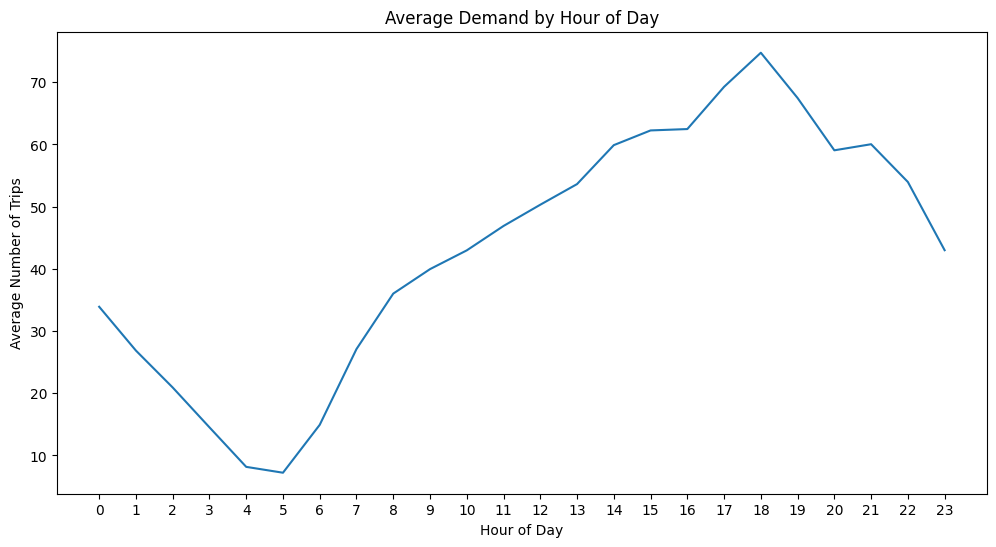

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

hourly_demand = df_output.groupby('pickup_hour')['num_trips'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_demand)
plt.title('Average Demand by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.xticks(range(0,24))
plt.show()

In [136]:
df_output['weekday'] = pd.to_datetime(df_output['pickup_date']).dt.dayofweek
df_output['is_weekend'] = df_output['weekday'].apply(lambda x: 1 if x>=5 else 0)

C:\Users\shara\AppData\Local\Temp\ipykernel_3640\3917041386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['weekday'] = pd.to_datetime(df_output['pickup_date']).dt.dayofweek
C:\Users\shara\AppData\Local\Temp\ipykernel_3640\3917041386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['is_weekend'] = df_output['weekday'].apply(lambda x: 1 if x>=5 else 0)


In [137]:
weekend_demand = df_output.groupby(['pickup_hour','is_weekend'])['num_trips'].mean().reset_index()


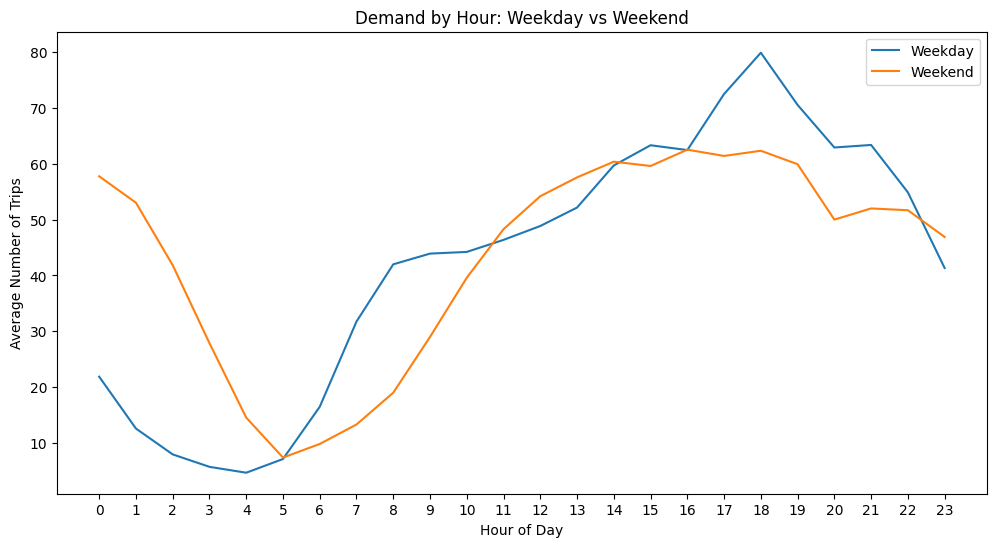

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Create the plot with custom colors
sns.lineplot(data=weekend_demand, x='pickup_hour', y='num_trips', hue='is_weekend', 
             palette={False: '#1f77b4', True: '#ff7f0e'})  # Blue for weekday, orange for weekend

plt.title('Demand by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.xticks(range(0,24))

# Fix the legend
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Weekday', 'Weekend'])

plt.show()

In [139]:
rainy = df_output[df_output['precip'] > 0]
clear = df_output[df_output['precip'] == 0]

print(f"Average demand on rainy days: {rainy['num_trips'].mean()}")
print(f"Average demand on clear days: {clear['num_trips'].mean()}")

Average demand on rainy days: 51.00683994528044
Average demand on clear days: 44.65462353545255


In [140]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

df_model = df_output.copy()

# Label encode categorical columns
for col in ['zone','borough','conditions']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))

In [141]:
df_model['day_of_week'] = pd.to_datetime(df_model['pickup_date']).dt.dayofweek

In [142]:
# Lag feature (previous hour demand per zone)
df_model = df_model.sort_values(['PULocationID', 'pickup_date', 'pickup_hour'])
df_model['lag_1'] = df_model.groupby('PULocationID')['num_trips'].shift(1).fillna(0)


In [143]:
# Target
y = df_model['num_trips']
X = df_model.drop(columns=['pickup_date', 'num_trips'])

In [144]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Test RMSE: 29.533782753492122


In [145]:
df_output.to_csv("urban_mobility_demand_forecast.csv", index=False)
